In [20]:
# Importing the necessary libraries
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



Df = pd.read_csv("train_syn.csv")
df = pd.read_csv("dev_in.csv")

X_train = Df.drop('power',axis=1)
y_train = Df['power']
X_test = df.drop('power',axis=1)
y_test = df['power']

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523190 entries, 0 to 523189
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   draft_aft_telegram           523190 non-null  float64
 1   draft_fore_telegram          523190 non-null  float64
 2   stw                          523190 non-null  float64
 3   diff_speed_overground        523190 non-null  float64
 4   awind_vcomp_provider         523190 non-null  float64
 5   awind_ucomp_provider         523190 non-null  float64
 6   rcurrent_vcomp               523190 non-null  float64
 7   rcurrent_ucomp               523190 non-null  float64
 8   comb_wind_swell_wave_height  523190 non-null  float64
 9   timeSinceDryDock             523190 non-null  float64
 10  time_id                      523190 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 43.9 MB


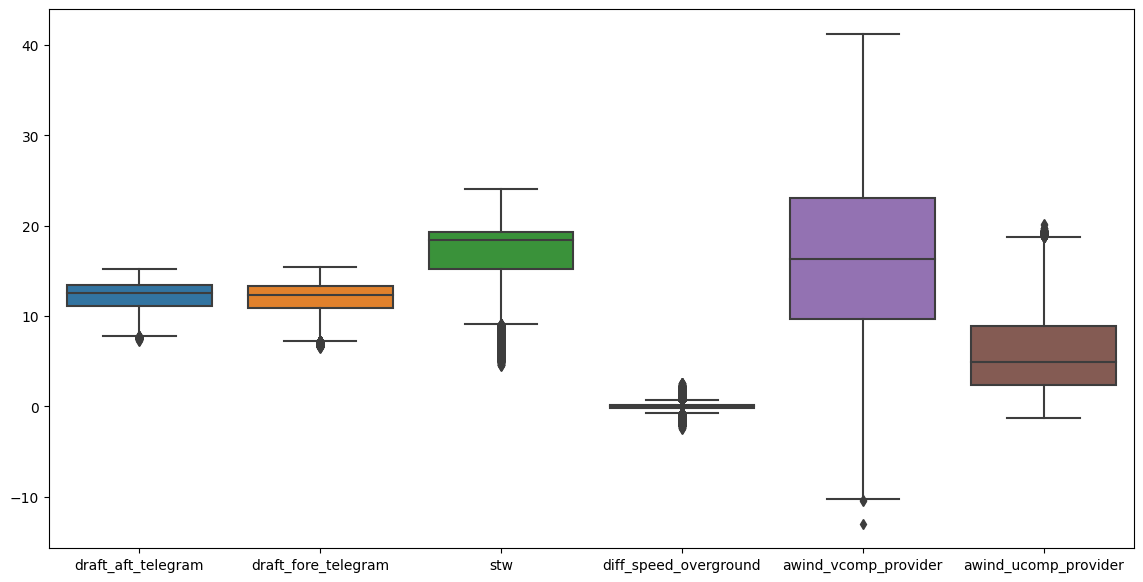

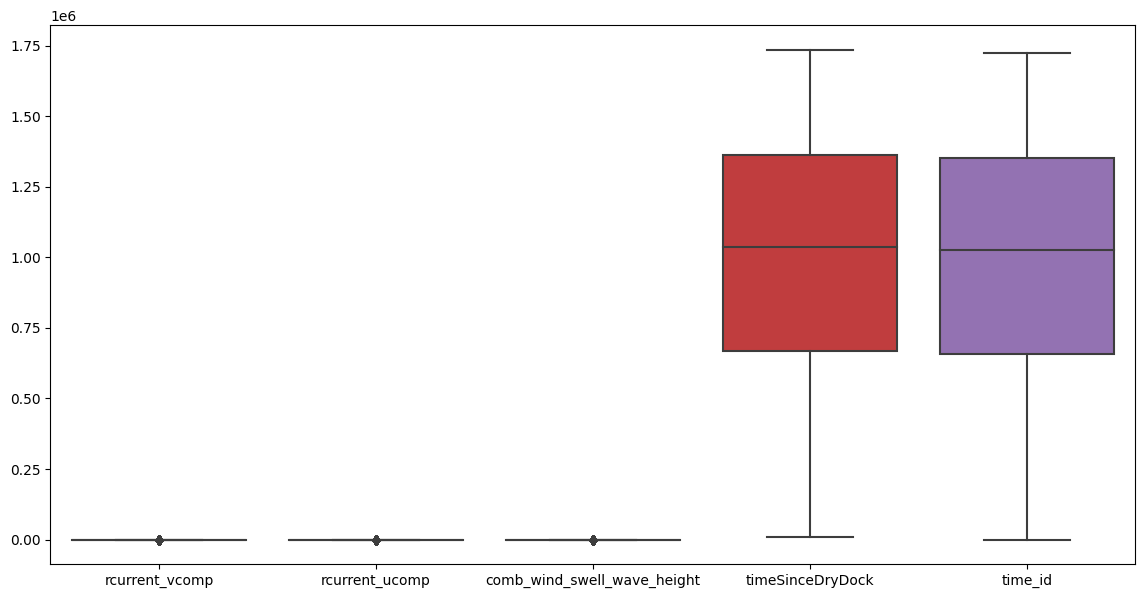

In [21]:
#PLotting the box plot.
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,0:6])
plt.show()
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,6:12])
plt.show()

In [22]:
from sklearn.preprocessing import RobustScaler as RS
features_names=[i for i in X_train.columns] 
scaler=RS()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(data=X_train, columns=features_names)
X_test=scaler.fit_transform(X_test)
X_test=pd.DataFrame(data=X_test, columns=features_names)

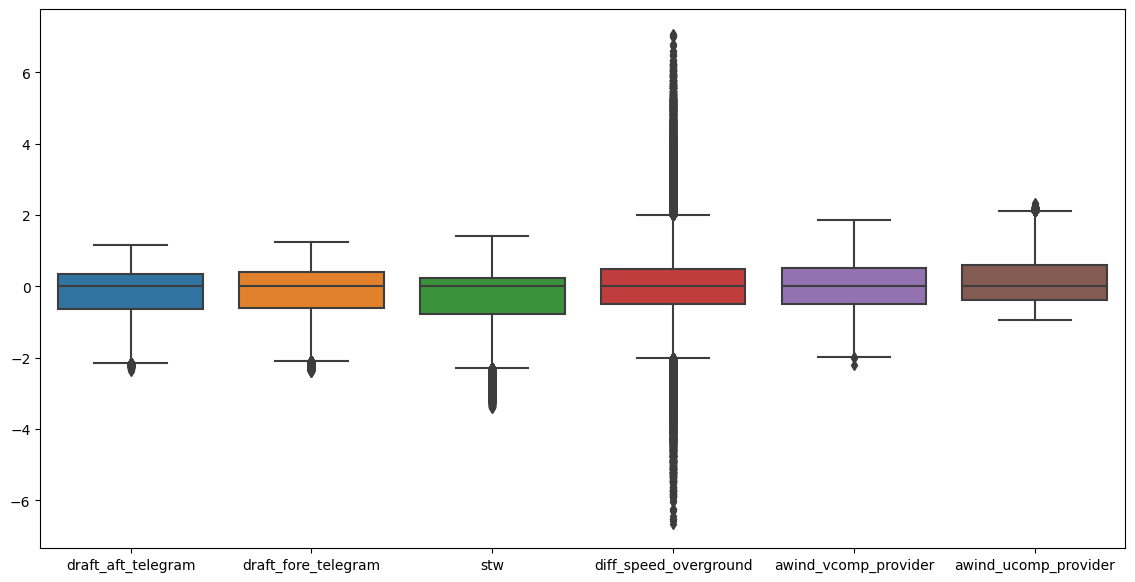

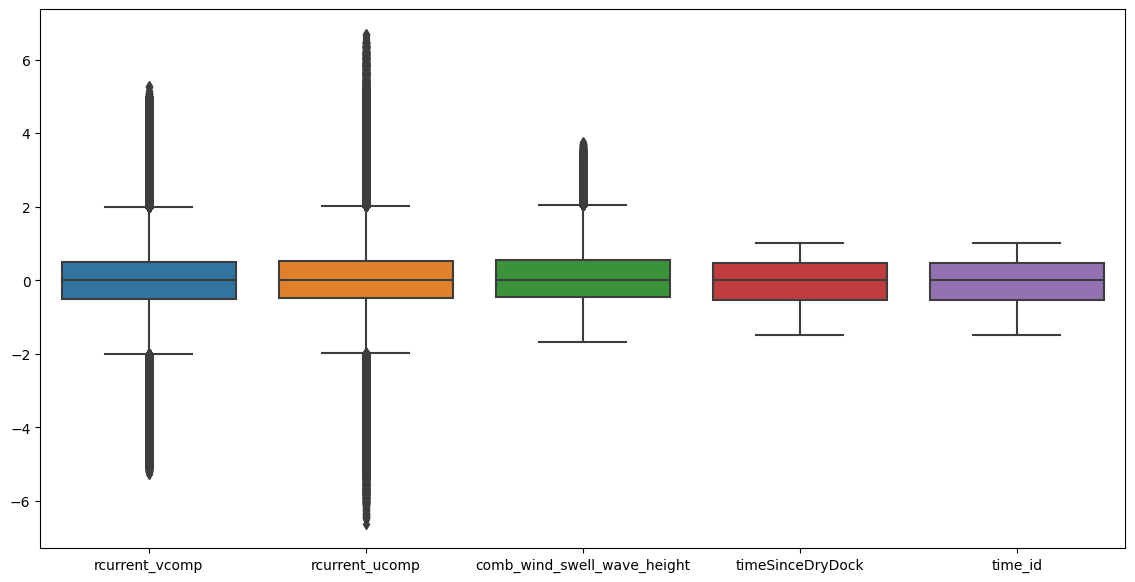

In [23]:
#PLotting the box plot.
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,0:6])
plt.show()
plt.figure(figsize=(14,7))
sns.boxplot(data=X_train.iloc[:,6:12])
plt.show()

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {
    'selection':['cyclic', 'random']
}
mod = Lasso()
best = GridSearchCV(mod,parameters)
best.fit(X_train,y_train)
b_p = best.best_params_ 
lasso = Lasso(alpha=1.0,selection=b_p['selection'])  # You can adjust the alpha value for regularization
lasso.fit(X_train, y_train)

# Predict on the testing set
y_pred_l = lasso.predict(X_test)

np.save('Lasso_sr',y_pred_l)

print(b_p)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_l)
print('Mean Squared Error:', mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_l)
print('R-squared Score:', r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_l, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test,y_pred_l)
print('Mean Absolute Error:', mae)
print(type(y_pred_l))
b_p

{'selection': 'random'}
Mean Squared Error: 13234961.070570173
R-squared Score: 0.8191401100602289
Root Mean Squared Error: 3637.988602314495
Mean Absolute Error: 2791.2877761316317
<class 'numpy.ndarray'>


{'selection': 'random'}

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters = {
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
mod = Ridge()
best = GridSearchCV(mod,parameters)
best.fit(X_train,y_train)
b_p = best.best_params_ 
ridge = Ridge(solver=b_p['solver'])  # You can adjust the alpha value for regularization strength

# Train the model
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_r = ridge.predict(X_test)
np.save('Ridge_sr',y_pred_r)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_r)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_r)
print('R-squared Score:', r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_r, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_r)
print('Mean Absolute Error:', mae)

b_p

Mean Squared Error: 13231452.870907106
R-squared Score: 0.819188050707849
Root Mean Squared Error: 3637.5064083664656
Mean Absolute Error: 2791.1061520679405


{'solver': 'sag'}

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

parameters = {
    'selection':['cyclic', 'random']
}
mod = ElasticNet()
best = GridSearchCV(mod,parameters)
best.fit(X_train,y_train)
b_p = best.best_params_ 
alpha = 0.5  # Regularization strength
l1_ratio = 0.5  # L1 regularization ratio
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio,selection=b_p['selection'])
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred_e = elastic_net.predict(X_test)
np.save('Elasticnet_sr',y_pred_e)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_e)
print('Mean Squared Error:', mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_e)
print('R-squared Score:', r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_e, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_e)
print('Mean Absolute Error:', mae)

b_p

Mean Squared Error: 21108500.529205922
R-squared Score: 0.7115457263418068
Root Mean Squared Error: 4594.39882130469
Mean Absolute Error: 3656.5922562727415


{'selection': 'random'}

In [27]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have your data stored in X and y variables

# Creating polynomial features
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Creating an instance of the Linear Regression model
p_r = LinearRegression()

# Training the model
p_r.fit(X_train, y_train)

# Making predictions on the test set
y_p_r = p_r.predict(X_test)
np.save('polynomial_sr',y_p_r)
# Calculating the mean squared error
mse = mean_squared_error(y_test, y_p_r)
r2 = r2_score(y_test, y_p_r)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_p_r, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_p_r)
print('Mean Absolute Error:', mae)


Mean Squared Error (MSE): 10578661.496544173
R-squared: 0.8554392760376552
Root Mean Squared Error: 3252.4854337174474
Mean Absolute Error: 2624.3212212974704


In [28]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

# Create an instance of the OLS (Ordinary Least Squares) model
model = sm.OLS(y_train, X_train)

# Fit the model to the data
pred = model.fit()
X_test = sm.add_constant(X_test)
y_pred_m = pred.predict(X_test)
np.save('multiple_sr',y_pred_m)
mse = mean_squared_error(y_test, y_pred_m)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_m)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_m, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_m)
print('Mean Absolute Error:',mae)


Mean Squared Error (MSE): 10578652.635657534
R-squared: 0.8554393971244476
Root Mean Squared Error: 3252.4840715455525
Mean Absolute Error: 2624.3197290429316


In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error',splitter='random',random_state=1)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = model.predict(X_test)
np.save('DecisionTree_sr',y_pred_dt)
# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred_dt)
print('Mean Squared Error:', mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_dt)
print('R-squared Score:', r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_dt)
print('Mean Absolute Error:', mae)

Mean Squared Error: 11345036.214250082
R-squared Score: 0.8449665253920092
Root Mean Squared Error: 3368.2393344669085
Mean Absolute Error: 2662.4979889814704


In [30]:
y_pred_rf = np.load('rfprediction_sr.npy')
mse = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:', mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_rf)
print('R-squared Score:', r2)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
print('Mean Absolute Error:', mae)

Mean Squared Error: 11152328.198827943
R-squared Score: 0.8475999408039564
Root Mean Squared Error: 3339.5101734877144
Mean Absolute Error: 2633.298211228181


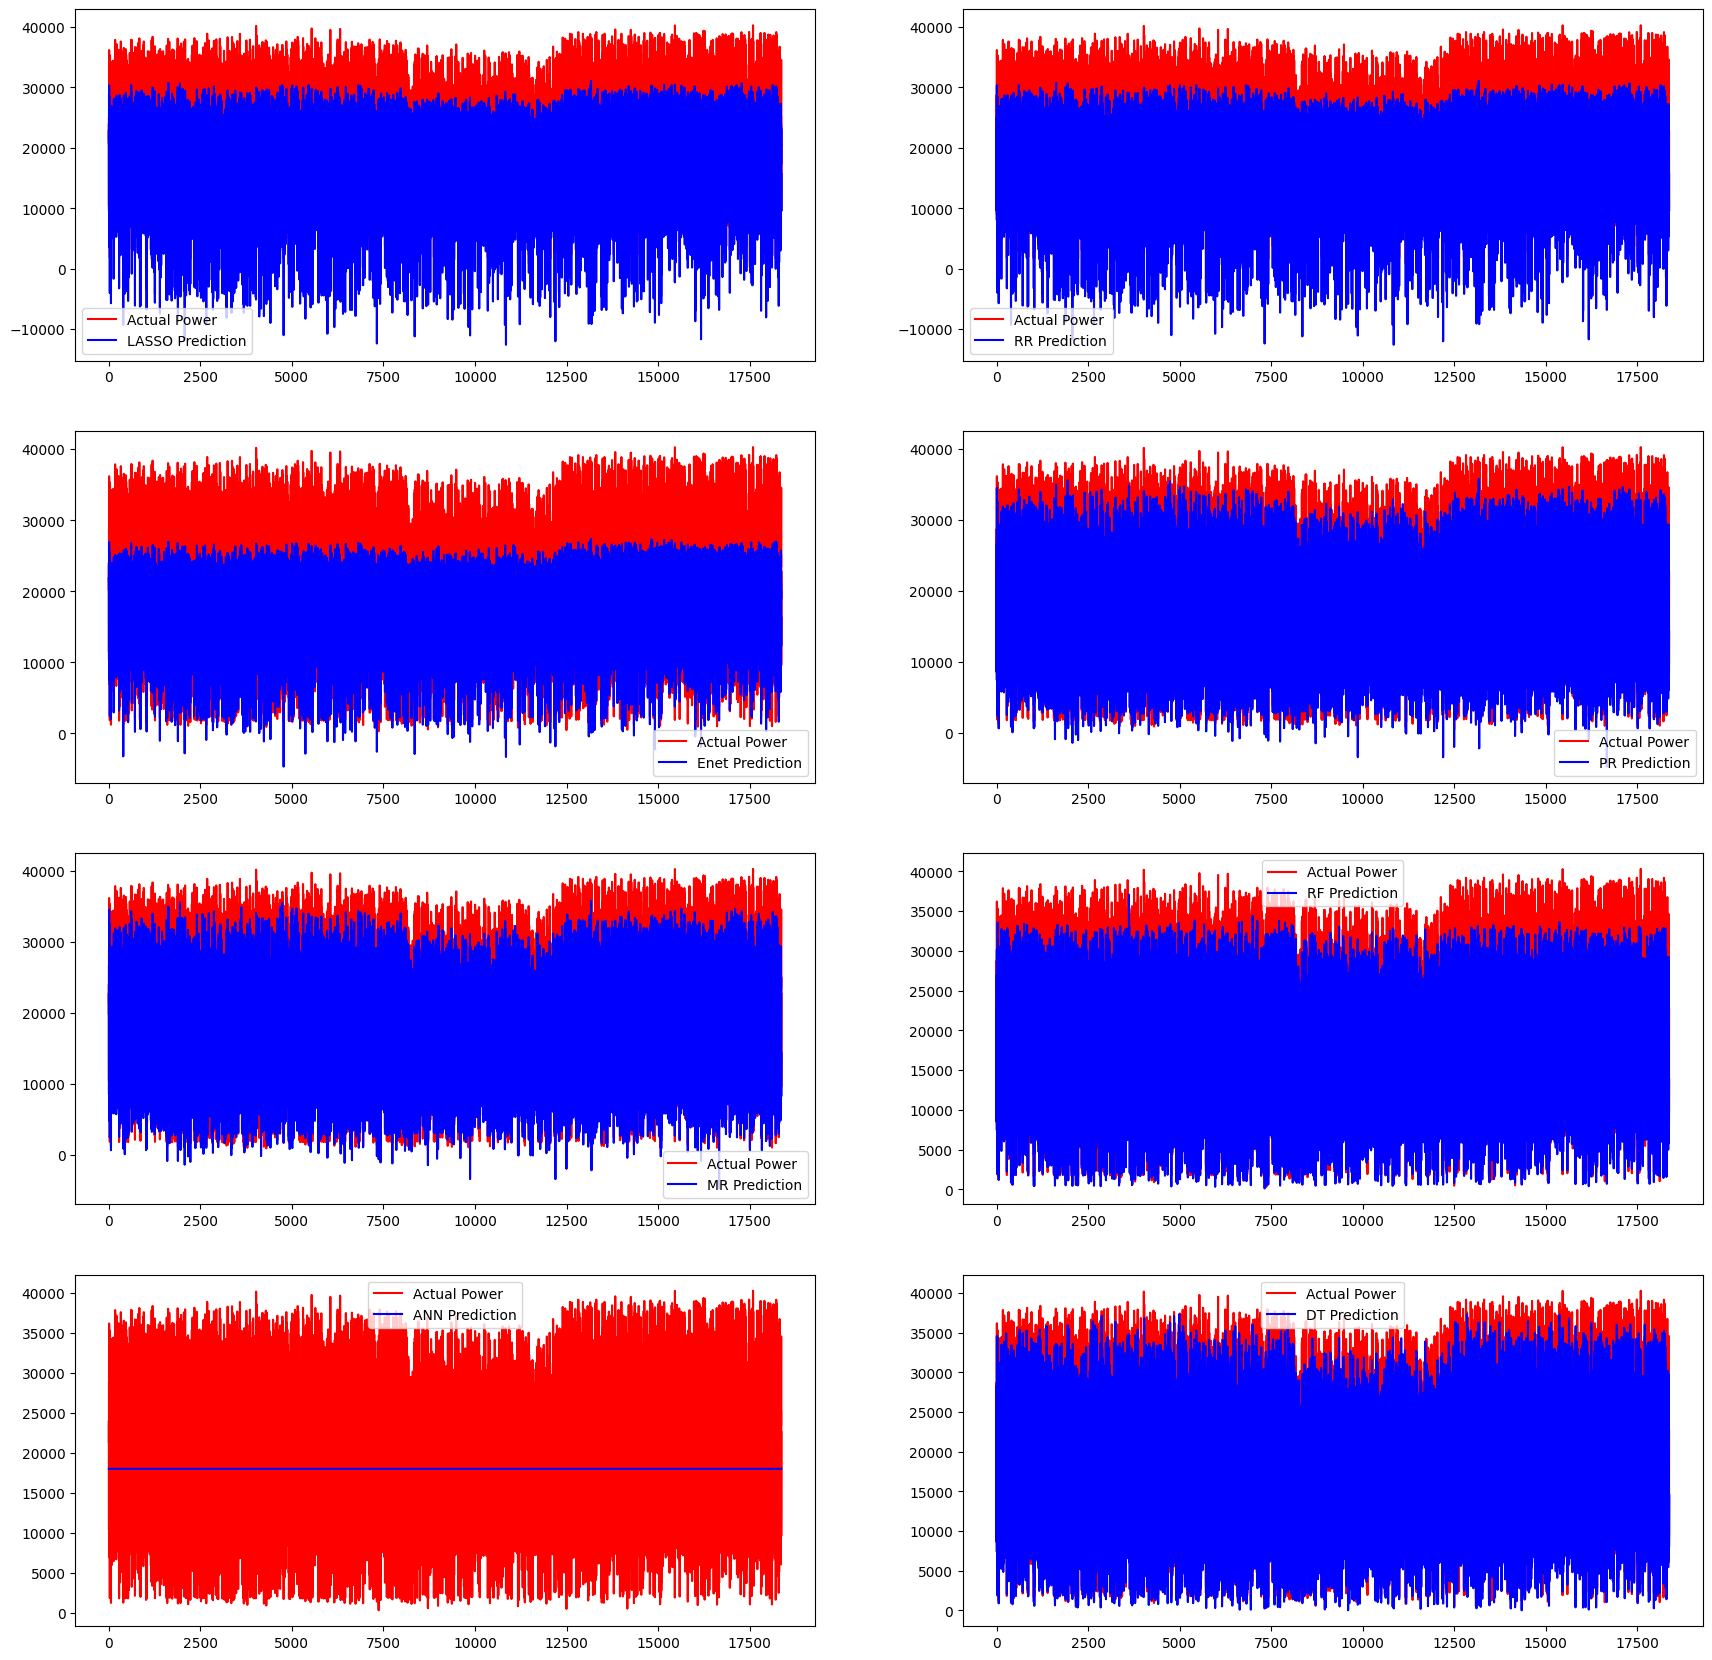

In [31]:
plt.figure(figsize=(21,21))
plt.subplot(4, 2, 1)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_l, color='b',label='LASSO Prediction')
plt.legend()
plt.subplot(4, 2, 2)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_r, color='b',label='RR Prediction')
plt.legend()
plt.subplot(4, 2, 3)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_e, color='b',label='Enet Prediction')
plt.legend()
plt.subplot(4, 2, 4)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_p_r, color='b',label='PR Prediction')
plt.legend()
plt.subplot(4, 2, 5)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_m, color='b',label='MR Prediction')
plt.legend()
plt.subplot(4, 2, 6)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_rf, color='b',label='RF Prediction')
plt.legend()
plt.subplot(4, 2, 7)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_mlp, color='b',label='ANN Prediction')
plt.legend()
plt.subplot(4, 2, 8)
plt.plot(y_test, color='r',label='Actual Power')
plt.plot(y_pred_dt, color='b',label='DT Prediction')
plt.legend()
plt.show()